### Check how generated sequence compares to thermo and to meso

In [56]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
sns.set_context('talk')

In [20]:
with open('../data/nomelt-model/test_predictions_aligned_results.json', 'r') as f:
    raw_data = json.load(f)

In [21]:
raw_data

[{'tg': {'seq1': 'M--------K-K-IALVAHDNKKKDMVEWAKK-NKEI--LSK-HE-LYATGTTGK-LI-KEAT-GLD-VH-RFL-SGPLGGDQQIGAKIAEGKIDV-LIFFWDPLEAQP--HDPDIKALLRIAVVYNIPVATNI-STADFLIKS-PLFD-D-EYE-KT-I-DCYDN----HFSREINL',
   'seq2': 'MGYREIIMGKQKRIALVAHDNKKQELLEWA-KFNK--GTLA-NH-ILYATGTTG-DIIERE--LGL-KV-IKF-YSGPLGGDQQIGAKIAEGEID-FLIFFWDPLE--PLPHDPDVKALLRIAVVWNIPIASN-RATADFII-SSPL--MNTEY-VR-LVPD-Y--QGYIH--RKINL',
   'score': 558.0,
   'begin': 0,
   'end': 178,
   'identity': 0.5561797752808989,
   'bpr': 3.134831460674157},
  'mt': {'seq1': 'MS--KNS-III-KEQKN-IALVAHDNKKA-ELLQWV-KD-NIE-SLKK--HN-LFATGTTGK-IISAET---GLN--ITN-FK-SGPLGGDQQIGSKIV-EGG-LDV-LIFFWDPLESQP--HDPDIKALLRIASV-YNIPN-ATNKSTADFLITSPYF---TDEYIKTT---DCFDN----HFSREINL',
   'seq2': 'M-GYR--EIIMGK-QK-RIALVAHDNKK-QELLEW-AK-FN-KGTL--ANH-ILYATGTTG-DII--E-RELGL-KVI--KF-YSGPLGGDQQIGAKI-AE-GEID-FLIFFWDPLE--PLPHDPDVKALLRIA-VVWNIP-IASNRATADFIISSP--LMNT-EYVR--LVPD-Y--QGYIH--RKINL',
   'score': 546.0,
   'begin': 0,
   'end': 190,
   'identity': 0.510526315789

In [22]:
melted = []
for r in raw_data:
    tg = r['tg']
    tg['from'] = 'tg'

    mt = r['mt']
    mt['from'] = 'mt'

    mg = r['mg']
    mg['from'] = 'mg'

    melted.extend([tg, mt, mg])
df = pd.DataFrame(melted)

In [23]:
df

,seq1,seq2,score,begin,end,identity,bpr,from
0,M--------K-K-IALVAHDNKKKDMVEWAKK-NKEI--LSK-HE-...,MGYREIIMGKQKRIALVAHDNKKQELLEWA-KFNK--GTLA-NH-I...,558.0,0,178,0.556180,3.134831,tg
1,MS--KNS-III-KEQKN-IALVAHDNKKA-ELLQWV-KD-NIE-SL...,M-GYR--EIIMGK-QK-RIALVAHDNKK-QELLEW-AK-FN-KGTL...,546.0,0,190,0.510526,2.873684,mt
2,MSKNSIIIKEQKNIALVAHDNKKA-ELLQWV-KD-NI-ES-LK-KH...,M-------K--K-IALVAHDNKK-KDMVEW-AK-KN-KE-IL-SKH...,608.0,0,174,0.626437,3.494253,mg
3,MS---T---MPLLEAEGL---HTYYGPSHILH---GVSL---RVLP...,MAHNGTREHM--L--E-LRNVHSYYG-A-I-HALKGISLTVDR---...,679.0,0,323,0.374613,2.102167,tg
4,M----TP---LLEVDGVSR---SF-GSVP-AL--VNASLTVERNS-...,MAHNGT-REHMLE---L-RNVHSYYGAI-HALKGI--SLTVDR--G...,617.0,0,342,0.333333,1.804094,mt
...,...,...,...,...,...,...,...,...
3019,MIGI--KD-K--IVFI-LIC-IVLGVI-LSI-QFKTVVSTVGEGVN...,M---NNK-LKGHLV-IALVCFL-LG-LML-VAQFR---ST------...,615.0,0,334,0.305389,1.841317,mt
3020,MIGIKDKI-VFI---LIC-IVLGVI-LSI-QFKTVV--STVGEGVN...,M---K-K-SVYISVALV-SIVLG-IMLS-TQFK-IVKKS----GV-...,635.0,0,324,0.342593,1.959877,mg
3021,M-Q-QI-VVFKLNNED-FC-VDI-NQVI-EIIRL---Q-TIIKVPD...,MSEKQ-YVVFKL-DEEEY-GIDIMN-V-KE-I--GPYQKS-VKVPN...,466.0,0,191,0.450262,2.439791,tg
3022,MSNNLEKL--IVFTSG---EQQYGLPLSQ-LLSI-ERV----KNIA...,MS---EK-QYVVF---KLDEEEYG--I--DIMNVKE-IGPYQKSV-...,368.0,0,204,0.289216,1.803922,mt


In [24]:
df.groupby('from').describe()['bpr']

,count,mean,std,min,25%,50%,75%,max
from,,,,,,,,
mg,1008.0,2.034286,0.652479,0.269880,1.670014,1.903743,2.245340,5.404255
mt,1008.0,1.947936,0.373666,1.394030,1.692558,1.861130,2.104198,4.260204
tg,1008.0,2.391104,0.935061,0.269231,1.861698,2.148670,2.645281,5.333333


In [25]:
identity_stats = df.groupby('from').describe()['identity']
identity_stats

,count,mean,std,min,25%,50%,75%,max
from,,,,,,,,
mg,1008.0,0.354408,0.126118,0.048193,0.286368,0.327827,0.391095,1.000000
mt,1008.0,0.336462,0.069087,0.225000,0.291419,0.319149,0.362943,0.795918
tg,1008.0,0.426876,0.190710,0.045326,0.317229,0.376316,0.464666,1.000000


/tmp/ipykernel_39111/1921940988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('from').mean()['identity'].plot.box()


<AxesSubplot: >

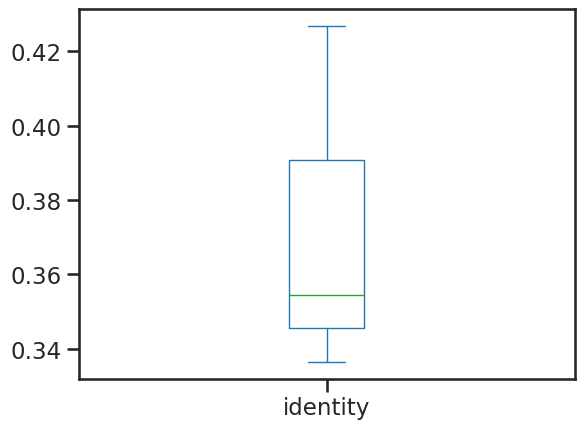

In [26]:
df.groupby('from').mean()['identity'].plot.box()

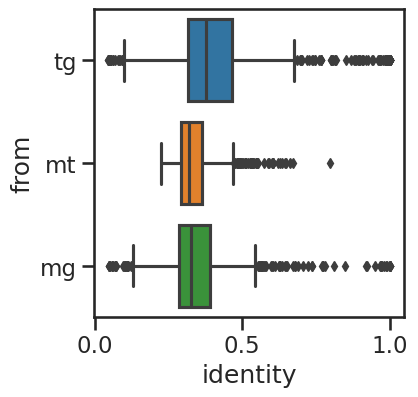

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylabel('sequence pair')

sns.boxplot(data=df, x='identity', y='from')
plt.savefig('../data/plots/generated_alignment_score_violin_to_thermo_or_meso.png', dpi=400, bbox_inches='tight')

In [106]:
for r in raw_data:
    r['gt_ratio'] = r['tg']['identity'] - r['mt']['identity']
    r['gm_ratio'] = r['mg']['identity'] - r['mt']['identity']

In [107]:
gt_ratio = [r['gt_ratio'] for r in raw_data]
gm_ratio = [r['gm_ratio'] for r in raw_data]
df2 = pd.DataFrame({'Generated-thermo': gt_ratio, 'Generated-meso': gm_ratio})

In [108]:
df2.describe()

,Generated-thermo,Generated-meso
count,1008.000000,1008.000000
mean,0.090414,0.017946
std,0.194137,0.116308
min,-0.473469,-0.477551
25%,-0.002390,-0.021436
50%,0.045240,0.004969
75%,0.118765,0.047451
max,0.742604,0.694915


In [109]:
df2_ = pd.melt(df2, value_vars=['Generated-thermo', 'Generated-meso'])

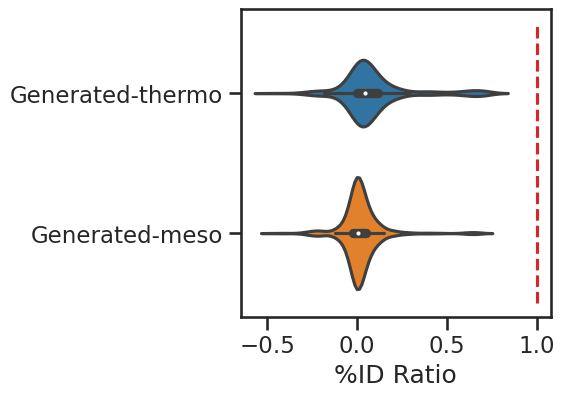

In [110]:

fig, ax = plt.subplots(figsize=(4,4))
sns.violinplot(data=df2_, x='value', y='variable', ax=ax)
ax.vlines(x=1.0, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='tab:red', ls='--')
ax.set_ylabel('')
ax.set_xlabel('%ID Ratio')
plt.savefig('../data/plots/generated_alignment_score_violin_to_thermo_or_meso_ratio.png', dpi=400, bbox_inches='tight')

In [43]:
df2

,Generated-thermo,Generated-meso
0,1.089424,1.227041
1,1.123839,0.972973
2,1.218462,1.181887
3,1.196394,1.031576
4,1.389441,1.556231
...,...,...
1003,1.635220,1.187879
1004,1.160920,0.996416
1005,3.885057,1.000000
1006,1.428477,1.121823


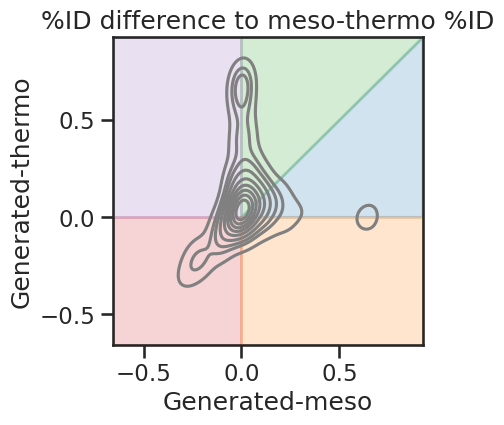

In [115]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=df2, x='Generated-meso', y='Generated-thermo', color='gray')
ax.set_title('%ID difference to meso-thermo %ID')

lims = (min([min(ax.get_xlim()), min(ax.get_ylim())]), max([max(ax.get_xlim()), max(ax.get_ylim())]))
ax.set_xlim(lims)
ax.set_ylim(lims)

# plt.xticks(np.arange(min(lims), max(lims), 1.0))
# plt.yticks(np.arange(min(lims), max(lims), 1.0))


ax.fill([lims[0],lims[0],0,0], [lims[0],0,0,lims[0]], lw=2, alpha=0.2, c='tab:red', label='"Poor"')
ax.fill([0,0,lims[1],lims[1]], [0,0,lims[1],0], lw=2, alpha=0.2, c='tab:blue', label='"Safe"')
ax.fill([0,0,lims[1],0], [0,lims[1],lims[1],0], lw=2, alpha=0.2, c='tab:green', label='"Good"')
ax.fill([lims[0],lims[0],0,0], [0,lims[1],lims[1],0], lw=2, alpha=0.2, c='tab:purple', label='"Good"')
ax.fill([0,0,lims[1],lims[1]], [lims[0],0,0,lims[0]], lw=2, alpha=0.2, c='tab:orange', label='"Safe"')

plt.savefig('../data/plots/generated_alignment_score_kde_sectors.png', dpi=400, bbox_inches='tight')

- Red: The translation is more unlike both meso and thermo than they are to eachother. Unsafe negative.
- Orange: The translation is more like the meso than the meso to thermo, but is not like the thermo. Safe negative
- Blue: The translation is more like both meso and thermo than they are to eachother, but more like meso. Interpolation. Partial positive.
- Green:  The translation is more like both meso and thermo than they are to eachother, but more like thermo. Interpolation. Positive.
- Purple: The translation is more like thermo than thermo to meso, but it is unlike the meso. Overshoot. Diverse Positive.

In [122]:
((df2['Generated-thermo'] < 0.0) * (df2['Generated-meso'] < 0.0)).sum()/len(df2)

0.1884920634920635

### Make triangle plot

/tmp/ipykernel_94899/2419001936.py:10: RuntimeWarning: invalid value encountered in sqrt
  y =np.sqrt(mg**2 - x**2)


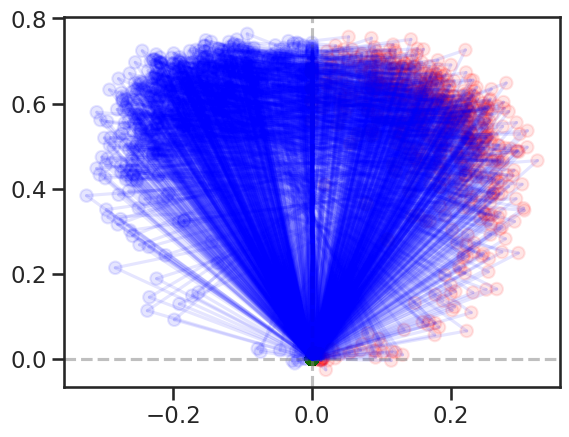

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def compute_distance(identity):
    return 1.0 - identity

def get_initial_meso(mg, mt, tg):
    x = (-mt**2 + tg**2 + mg**2)/tg
    # print(x, mg)
    y =np.sqrt(mg**2 - x**2)
    return (x,y)

def rotate_point(point, angle):
    x, y = point
    x_new = x * np.cos(angle) - y * np.sin(angle)
    y_new = x * np.sin(angle) + y * np.cos(angle)
    return (x_new, y_new)

def plot_triangle(r, ax):
    try:
        identity_tg = r['tg']['identity']
        identity_mt = r['mt']['identity']
        identity_mg = r['mg']['identity']
    
        
        dist_tg = compute_distance(identity_tg) + 1e-10
        dist_mt = compute_distance(identity_mt) + 1e-10
        dist_mg = compute_distance(identity_mg) + 1e-10
        # print(dist_mt, dist_mg + dist_tg)
        # place gen at orgin, thermo on the x axis, then find meso position using distances
        G = (0.0, 0.0)
        T = (dist_tg, 0.0)
        M = get_initial_meso(dist_mg, dist_mt, dist_tg)
        
        # Compute centroid
        centroid_x = (T[0] + M[0]) / 3
        centroid_y = (M[1]) / 3

        # angle for x axis
        angle_with_x = np.arctan2(centroid_y, centroid_x)
        # get y axis
        theta = np.pi/2 - angle_with_x
        # print(theta)
        
        # Rotate thermo and meso around gen
        thermo_rotated =  rotate_point(T, theta)
        meso_rotated = rotate_point(M, theta)
    except:
        print(r)
        raise
    
    # Plotting
    ax.plot([G[0], thermo_rotated[0]], [G[1], thermo_rotated[1]], 'b-', alpha=0.1)
    ax.plot([G[0], meso_rotated[0]], [G[1], meso_rotated[1]], 'b-', alpha=0.1)
    ax.plot([thermo_rotated[0], meso_rotated[0]], [thermo_rotated[1], meso_rotated[1]], 'b-', alpha=0.1)
    
    ax.scatter([G[0], thermo_rotated[0], meso_rotated[0]], [G[1], thermo_rotated[1], meso_rotated[1]], c=['green', 'red', 'blue'], alpha=0.1)

fig, ax = plt.subplots()
ax.axhline(0, color='grey', linestyle='--', alpha=0.5)
ax.axvline(0, color='grey', linestyle='--', alpha=0.5)

def do_one(r):
    plot_triangle(r, ax)

for i, r in enumerate(raw_data):
    do_one(r)
    # if i > 10:
    #     break

plt.show()


In [33]:
# Try just a single triangle with the mean
identity_stats.rename(columns={''})

,count,mean,std,min,25%,50%,75%,max
from,,,,,,,,
mg,1008.0,0.354408,0.126118,0.048193,0.286368,0.327827,0.391095,1.000000
mt,1008.0,0.336462,0.069087,0.225000,0.291419,0.319149,0.362943,0.795918
tg,1008.0,0.426876,0.190710,0.045326,0.317229,0.376316,0.464666,1.000000


In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='grey', linestyle='--', alpha=0.5)
ax.axvline(0, color='grey', linestyle='--', alpha=0.5)